# Stock Market Analysis Project

### Objective

The goal of this project is to analyze historical stock data to identify trends, patterns, and anomalies. By applying statistical modeling and time series analysis techniques, you will also attempt to predict future stock prices. This analysis can provide valuable insights for making informed investment decisions.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Collect Historical Stock Data

In [16]:
import yfinance as yf

# Download historical data for a stock (e.g., Apple)
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
stock_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742668,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400551,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565224,132079200


## 2. Clean and Preprocess the Data

In [17]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       756 non-null    float64
 1   High       756 non-null    float64
 2   Low        756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [18]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
stock_data.duplicated().sum()

np.int64(0)

## 3. Perform Exploratory Data Analysis (EDA)

##### 3.1. Visualize Stock Prices: Plot the stock's closing price over time to observe general trends.

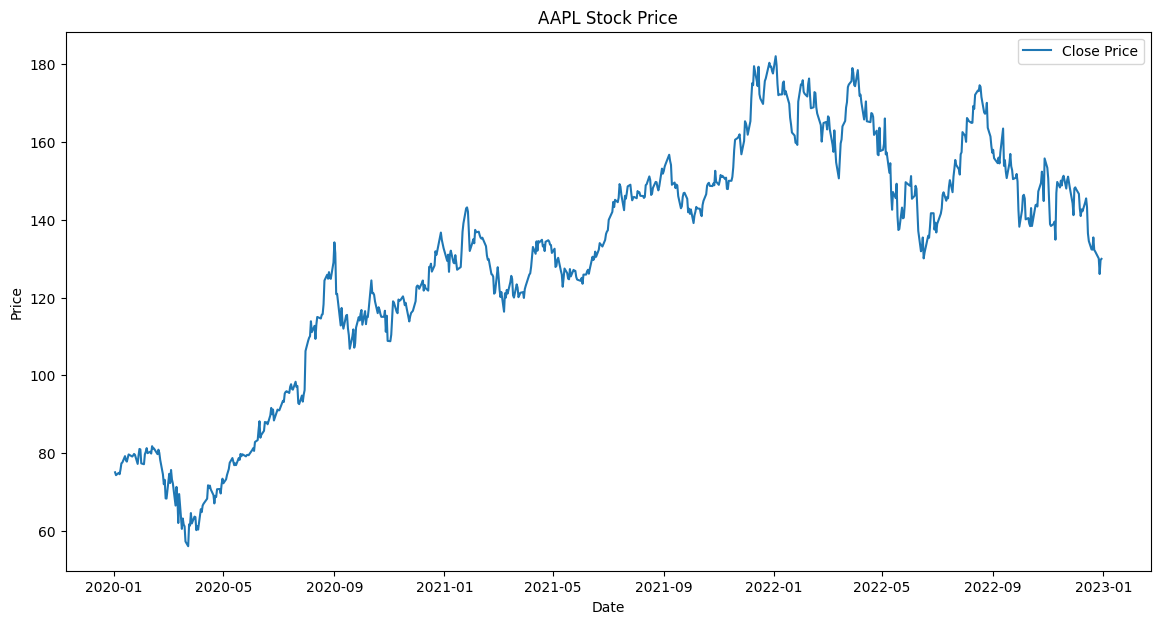

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

##### Market Trend Analysis insight 
<br>
From April 2020 to January 2022, the market demonstrated a consistently bullish trend. During this period, there was a general upward trajectory in prices, with only minor fluctuations observed. This steady growth reflects a strong and sustained positive sentiment among investors, characterized by persistent upward momentum with occasional, minor deviations.

##### 3.2. Moving Averages: Calculate and plot moving averages (e.g., 50-day and 200-day) to smooth the time series and identify long-term trends.

In [21]:
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()
stock_data['300_MA'] = stock_data['Close'].rolling(window=300).mean()

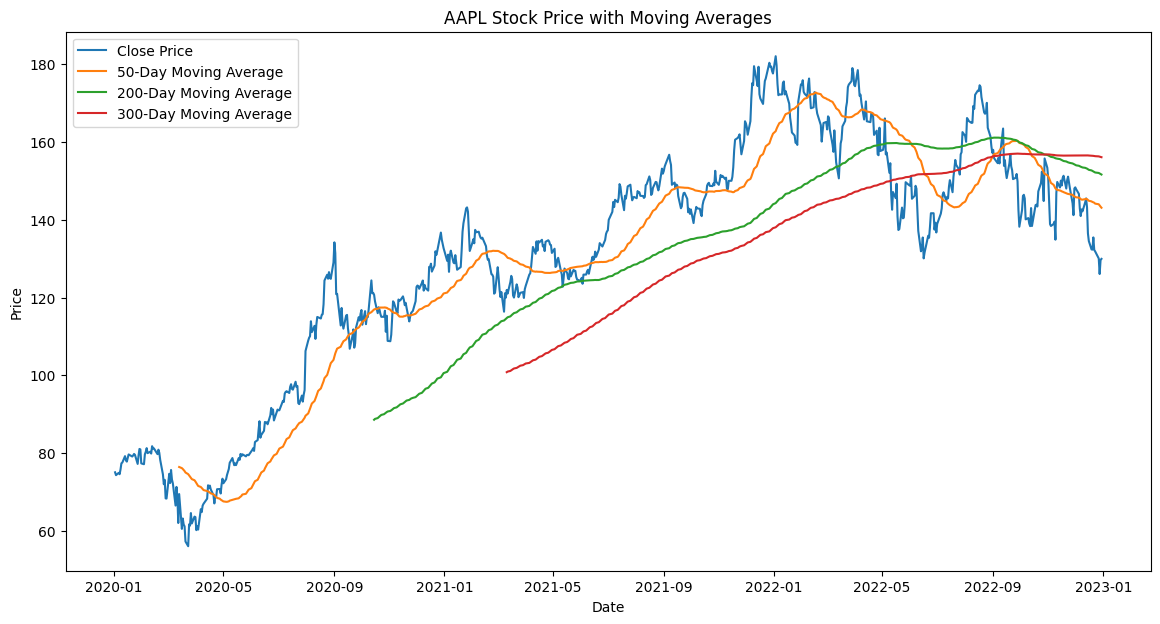

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['50_MA'], label='50-Day Moving Average')
plt.plot(stock_data['200_MA'], label='200-Day Moving Average')
plt.plot(stock_data['300_MA'], label='300-Day Moving Average')
plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

##### Market Trend Analysis insights
<br>
1. From May 2020 to June 2022, the market exhibited a bullish trend, characterized by rising prices and positive investor sentiment. During this period, the market showed sustained growth and upward momentum.
<br>
2. Conversely, from July 2022 to January 2023, the market experienced a bearish trend. This phase was marked by declining prices and negative investor sentiment, reflecting a downturn in market performance.

##### 3.3. Volatility Analysis: Measure and plot stock volatility (standard deviation of returns) to understand price fluctuations.

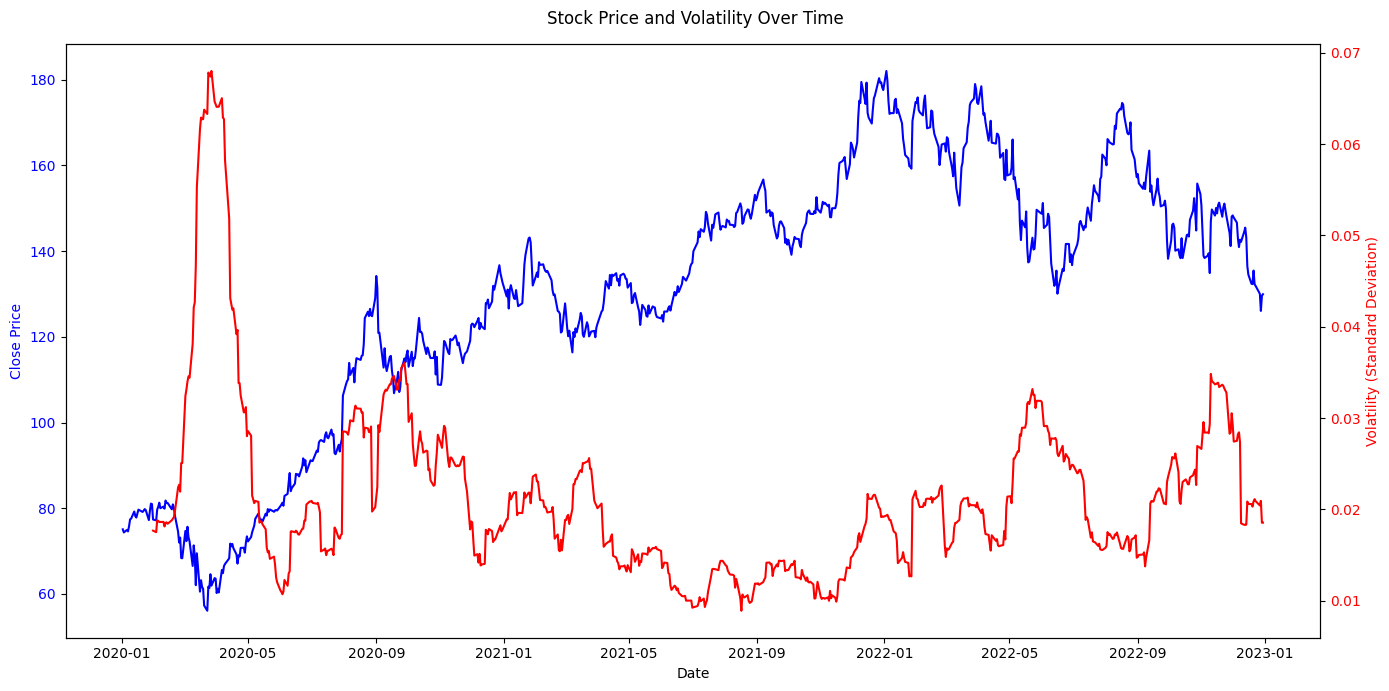

In [23]:
stock_data['Daily Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Daily Return'].rolling(window=20).std()
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(stock_data.index, stock_data['Close'], color='blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volatility (Standard Deviation)', color='red')
ax2.plot(stock_data.index, stock_data['Volatility'], color='red', label='Volatility (20-day)')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Stock Price and Volatility Over Time')
fig.tight_layout()
plt.show()

 ##### Market Trend Analysis insights
<br><br>
1. From January 2020 to May 2020, the market was in a bearish phase. During this period, prices declined significantly from 80 to 30, reflecting a downward trend. Additionally, the market experienced high volatility, with a standard deviation of approximately 0.07, indicating substantial fluctuations in price levels.
<br><br>
2. The market exhibited a bullish trend from April 2020 to January 2023. The most notable period of this bullish trend was between December 2021 and May 2022. During this phase, the market reached its highest price of 180 and its lowest price of 150, reflecting strong and consistent growth.
<br><br>
3. Additionally, market volatility decreased significantly over the entire bullish period. From April 2020 to January 2023, the standard deviation of returns dropped from 0.07 to 0.02, indicating reduced fluctuations and a more stable price movement as the market progressed.


## 4. Time Series Analysis

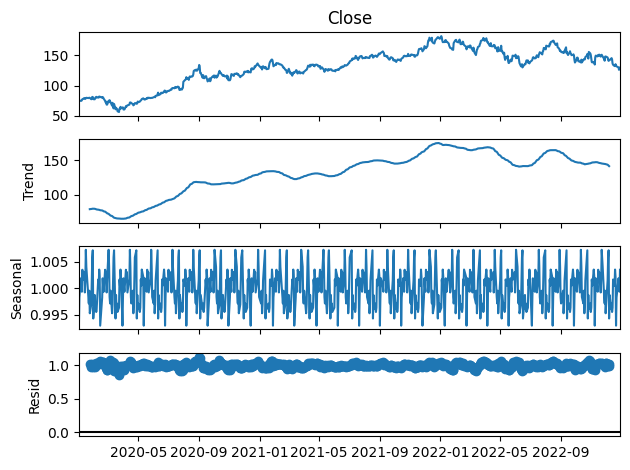

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(stock_data['Close'], model='multiplicative', period=30)
decomposition.plot()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity with ADF test
result = adfuller(stock_data['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.8953789647960486
p-value: 0.33423810459018727


##### Analysis of Stationarity:

The Augmented Dickey-Fuller (ADF) test results initially suggested that the time series might be non-stationary.Specifically:
<br>
ADF Statistic: -1.8954<br>
p-value: 0.3342<br>
Interpretation:<br>

ADF Statistic: The value of -1.8954 was not sufficiently negative, which indicated weak evidence against the null hypothesis of a unit root.
p-value: The p-value of 0.3342 was above the conventional significance level (e.g., 0.05), suggesting that we could not reject the null hypothesis of non-stationarity.
<br>
Thus, based on these results, the series appeared to be non-stationary.

##### Apply Transformations
<br>
First-order differencing: Subtract the previous observation from the current observation.

In [26]:
stock_data['Differenced'] = stock_data['Close'] - stock_data['Close'].shift(1)


In [27]:
result = adfuller(stock_data['Differenced'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -29.171003879088016
p-value: 0.0


##### Stationarity Analysis:

The Augmented Dickey-Fuller (ADF) test results for the time series are as follows:
<br>
ADF Statistic: -29.1710<br>
p-value: 0.0<br>
Interpretation:
<br>
The ADF statistic of -29.1710 is highly negative, indicating strong evidence against the null hypothesis of a unit root. The p-value of 0.0 is significantly below common significance levels (e.g., 0.05 or 0.01), confirming that we can reject the null hypothesis.

Conclusion:
<br>
These results suggest that the time series is stationary, as there is strong evidence that the series does not have a unit root and its statistical properties (mean, variance) remain consistent over time. This is a favorable condition for conducting further time series analysis and modeling.

## 5. Implement Statistical Models to Predict Future Stock Prices

ARIMA Model<br>
Use the AutoRegressive Integrated Moving Average (ARIMA) model to forecast future prices. Tune the model's parameters (p, d, q) using techniques like grid search.

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Assume you have already split your data
train = stock_data['Close'][:int(len(stock_data) * 0.8)]
test = stock_data['Close'][int(len(stock_data) * 0.8):]

model = ARIMA(train, order=(5, 1, 0))
arima_result = model.fit()
y_pred = arima_result.forecast(steps=len(test))

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, y_pred)
rmse = np.sqrt(mean_squared_error(test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 10.533185731285608
Root Mean Squared Error (RMSE): 13.494664677244021


In [38]:
predicted_values = arima_result.get_forecast(steps=30)
predicted_mean = predicted_values.predicted_mean
predicted_conf_int = predicted_values.conf_int()


last_date = stock_data.index[-1]
predicted_dates = pd.date_range(start=last_date, periods=30, freq='D')

##### Objective:
To evaluate and compare the predictive accuracy of the ARIMA/SARIMA model with the Exponential Smoothing model. This comparison will help determine which model provides more accurate forecasts for our time series data.

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

start = len(train)

exp_smooth_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
exp_smooth_pred = exp_smooth_model.predict(start=start, end=len(stock_data) - 1)

exp_smooth_mae = mean_absolute_error(test, exp_smooth_pred)
exp_smooth_rmse = np.sqrt(mean_squared_error(test, exp_smooth_pred))

print(f"Exponential Smoothing Mean Absolute Error (MAE): {exp_smooth_mae}")
print(f"Exponential Smoothing Root Mean Squared Error (RMSE): {exp_smooth_rmse}")




Exponential Smoothing Mean Absolute Error (MAE): 10.378978624646056
Exponential Smoothing Root Mean Squared Error (RMSE): 13.326527082137007


##### Error Metrics Analysis
Exponential Smoothing MAE: 10.37<br>
Exponential Smoothing RMSE: 13.39<br>
<br>
Comparison to ARIMA:<br>

ARIMA MAE: 10.53<br>
ARIMA RMSE: 13.49<br>
<br>
Insights:<br>

MAE Comparison: The MAE for Exponential Smoothing is slightly lower than for ARIMA (10.37 vs. 10.53), indicating that on average, Exponential Smoothing predictions are closer to the actual values.<br>
RMSE Comparison: The RMSE for Exponential Smoothing is also slightly lower than for ARIMA (13.39 vs. 13.49), suggesting that Exponential Smoothing has slightly better performance in terms of the magnitude of prediction errors.

## 6. Visualize the Trends and Predictions




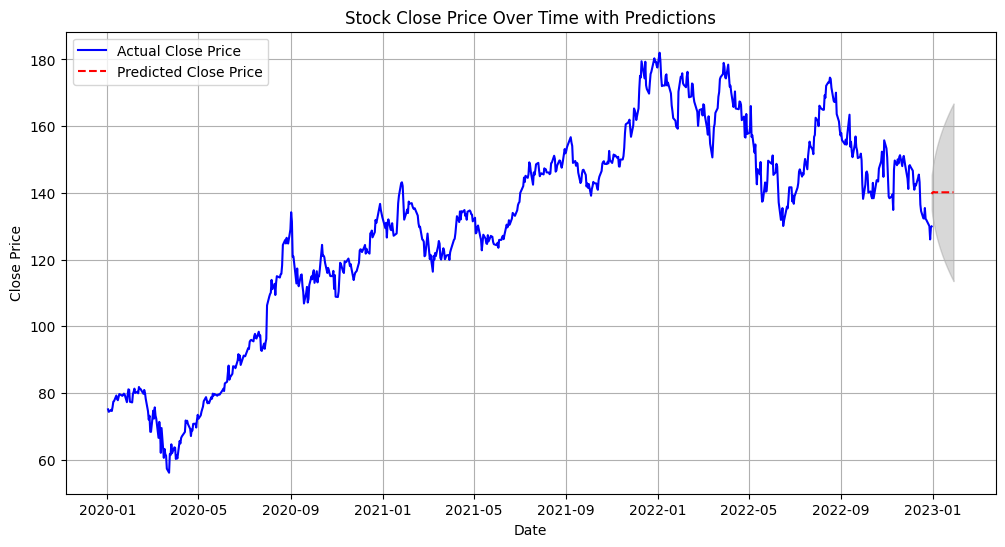

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Close Price', color='blue')

plt.plot(predicted_dates, predicted_mean, label='Predicted Close Price', color='red', linestyle='--')
plt.fill_between(predicted_dates, predicted_conf_int.iloc[:, 0], predicted_conf_int.iloc[:, 1], color='gray', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time with Predictions')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

##### Prediction Stability:<br>
Observation: The predicted stock prices are fairly stable, with values ranging between 139.85 and 140.26, and eventually plateauing at around 140.165572.<br>
Insight: The model predicts that the stock price will remain stable in the near future, with minimal volatility. This could indicate a period of consolidation in the market, where the stock price is not expected to make significant moves either upward or downward. Investors might interpret this as a signal that the stock is currently in a "holding pattern," where no major changes in sentiment or market conditions are expected.

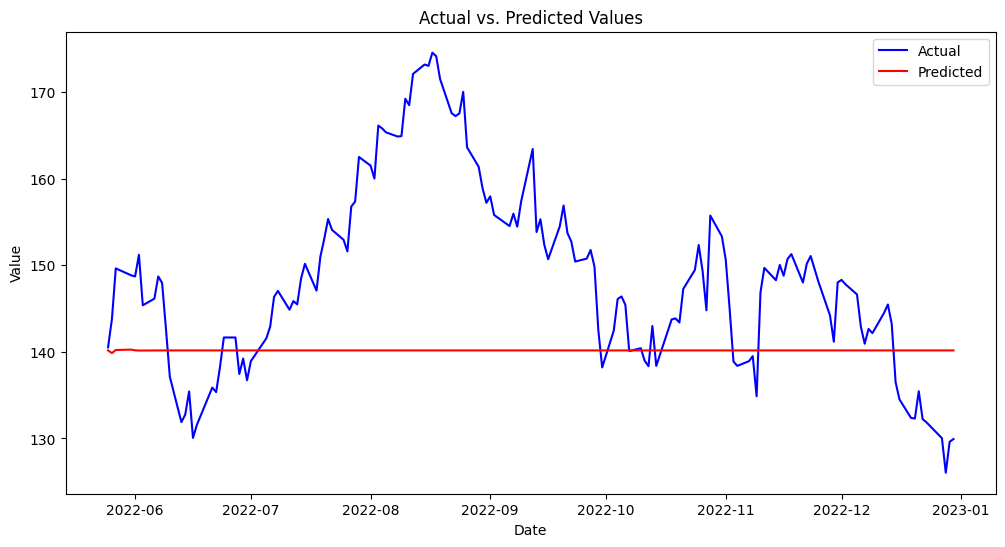

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, y_pred, label='Predicted', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

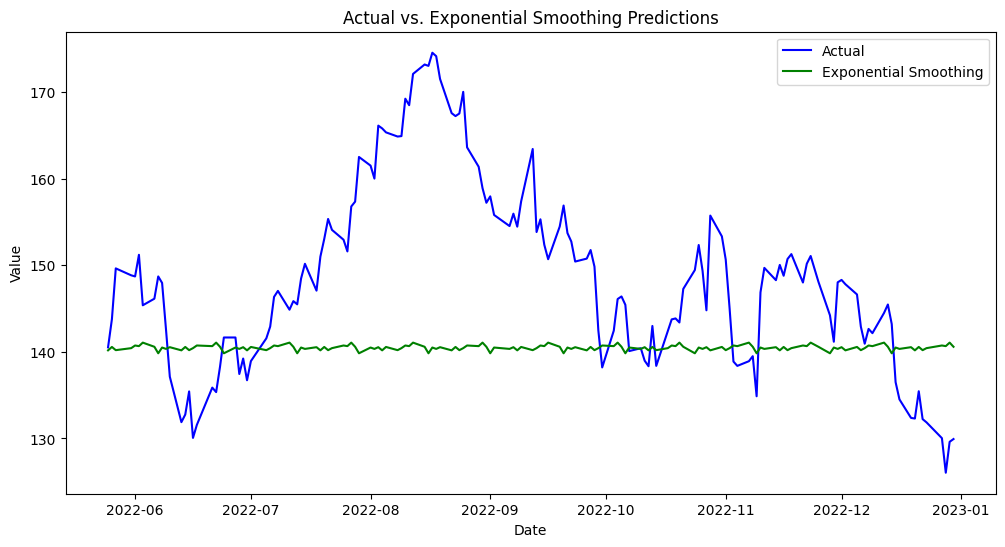

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, exp_smooth_pred, label='Exponential Smoothing', color='green')
plt.title('Actual vs. Exponential Smoothing Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Key Insights:<br>

##### 1. Market Trend Analysis:<br>

    1.1 Bullish Phase (April 2020 to January 2022): The market showed a consistently bullish trend with steady growth and minimal fluctuations, reflecting strong positive sentiment.<br>

    1.2 Bullish Trend (May 2020 to June 2022): The market maintained a bullish trend with rising prices and positive investor sentiment, indicating sustained growth.<br>

    1.3 Bearish Phase (July 2022 to January 2023): The market shifted to a bearish trend with declining prices and negative sentiment, signaling a downturn in performance.<br>

    1.4 Bearish Phase (January 2020 to May 2020): The market was bearish with a significant price decline from 80 to 30, accompanied by high volatility (standard deviation ~0.07).<br>

    1.5 Notable Bullish Phase (April 2020 to January 2023): Strong bullish trend, especially from December 2021 to May 2022, with prices ranging from 150 to 180. Volatility decreased over this period, with a standard deviation dropping from 0.07 to 0.02.<br><br>

##### 2. Stationarity Analysis:<br>

    2.1 Non-Stationarity Indication: Initial ADF test results (ADF Statistic: -1.8954, p-value: 0.3342) suggested that the time series might be non-stationary.<br>

    2.2 Confirmed Stationarity: Further analysis with ADF test results (ADF Statistic: -29.1710, p-value: 0.0) confirmed the series is stationary, suitable for time series modeling.<br><br>

##### 3. Error Metrics Analysis:<br>

    3.1 Exponential Smoothing Performance:<br>     - MAE: 10.37<br>     - RMSE: 13.39<br>

    3.2 ARIMA Performance:<br>     - MAE: 10.53<br>     - RMSE: 13.49<br>

    3.3 Comparison: Exponential Smoothing slightly outperforms ARIMA in both MAE and RMSE, indicating more accurate predictions.<br><br>

##### 4. Prediction Stability:<br>

    4.1 Observation: Predicted stock prices remain stable, ranging between 139.85 and 140.26, plateauing around 140.165572.<br>

    4.2 Insight: This stability suggests a period of market consolidation with minimal expected price movements, indicating a "holding pattern" for investors.<br><br>

Summary:<br> The market analysis reveals a strong bullish trend from April 2020 to January 2022, followed by a period of steady growth until June 2022. However, a bearish trend emerged from July 2022 to January 2023, marked by declining prices and negative sentiment. The stationarity analysis confirmed that the time series data is stationary, making it suitable for further modeling.<br><br>

In comparing the prediction accuracy of the Exponential Smoothing model to ARIMA, the former slightly outperforms ARIMA in terms of MAE and RMSE, suggesting better prediction accuracy. The predictions indicate a stable stock price with minimal volatility, pointing to a period of market consolidation.